<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTo6yE-I8__1Cm0ounu929QKTD1mVTAc_MdHNkmonHBZ_vIO4ti&usqp=CAU">
<h1> Décision Tree : Arbre de décision de classification </h1>

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import graphviz 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Preprocessing déja repris du précédent projet

In [2]:
clean = pd.read_csv("train_clean.csv")
clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult


In [3]:
data = clean.drop(['PassengerId','Name','Ticket'],axis=1)
data['Sex'] = data['Sex'].astype("category").cat.codes
cat =['Pclass','SibSp','Parch','Embarked','Age_categories']
datadums = pd.get_dummies(data, prefix = cat, columns = cat)
datadums

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,...,Embarked_C,Embarked_Q,Embarked_S,Age_categories_Adult,Age_categories_Child,Age_categories_Infant,Age_categories_Missing,Age_categories_Senior,Age_categories_Teenager,Age_categories_Young Adult
0,0,1,22.0,7.2500,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,38.0,71.2833,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,26.0,7.9250,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,35.0,53.1000,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,35.0,8.0500,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,1,27.0,13.0000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
885,1,0,19.0,30.0000,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
886,0,0,29.5,23.4500,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
887,1,1,26.0,30.0000,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
y = datadums.pop('Survived')
scaler = StandardScaler()
datascaledums = scaler.fit_transform(datadums)

## Construction de l'arbre de décision 

In [5]:
X = datascaledums
Xtrain,Xtest,ytrain,ytest =train_test_split(X,y,random_state=5, test_size=.3)

In [6]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, Xtrain, ytrain, cv=10)

array([0.79365079, 0.82539683, 0.79365079, 0.79365079, 0.74603175,
       0.79032258, 0.85483871, 0.72131148, 0.81967213, 0.68852459])

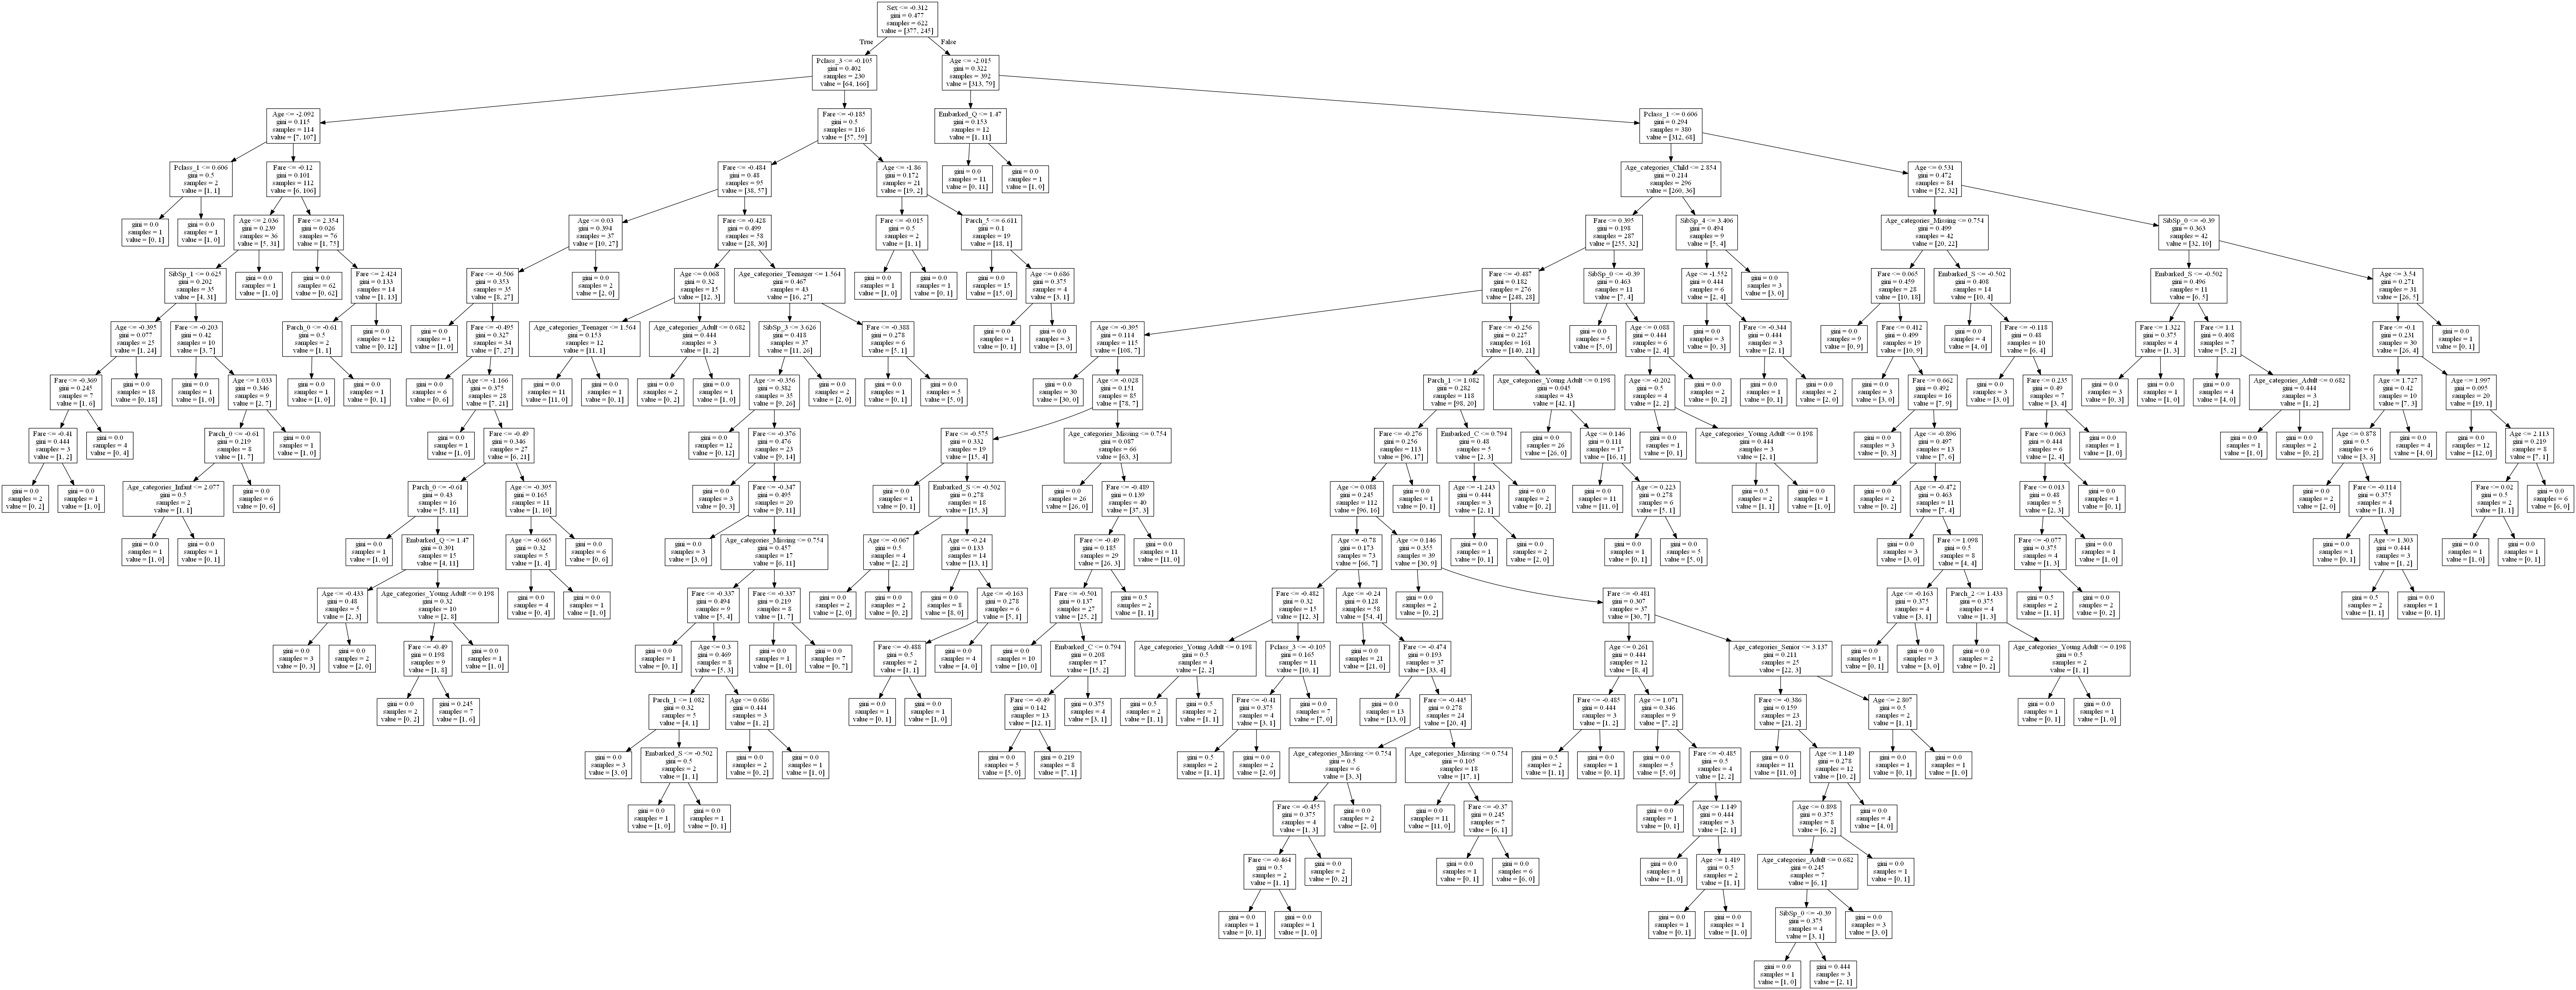

In [7]:
dot_data = StringIO()  
export_graphviz(clf.fit(Xtrain, ytrain), out_file=dot_data, feature_names=datadums.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

## Optimisation des hyper parametres 

In [8]:
params = {'criterion':('gini', 'entropy'), 'splitter':['best','random'],'max_depth':[i for i in range(2, 20)],'min_samples_split':[i for i in range(2, 50)],'class_weight':['balanced', None]}
gridtree = GridSearchCV(estimator=clf, param_grid=params)
gridtree.fit(Xtrain,ytrain)

C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn'...
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ('gini', 'entropy'),
                         

In [9]:
gridtree.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 21,
 'splitter': 'best'}

In [10]:
print(classification_report(ytest, gridtree.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       172
           1       0.76      0.72      0.74        95

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.82      0.82      0.82       267



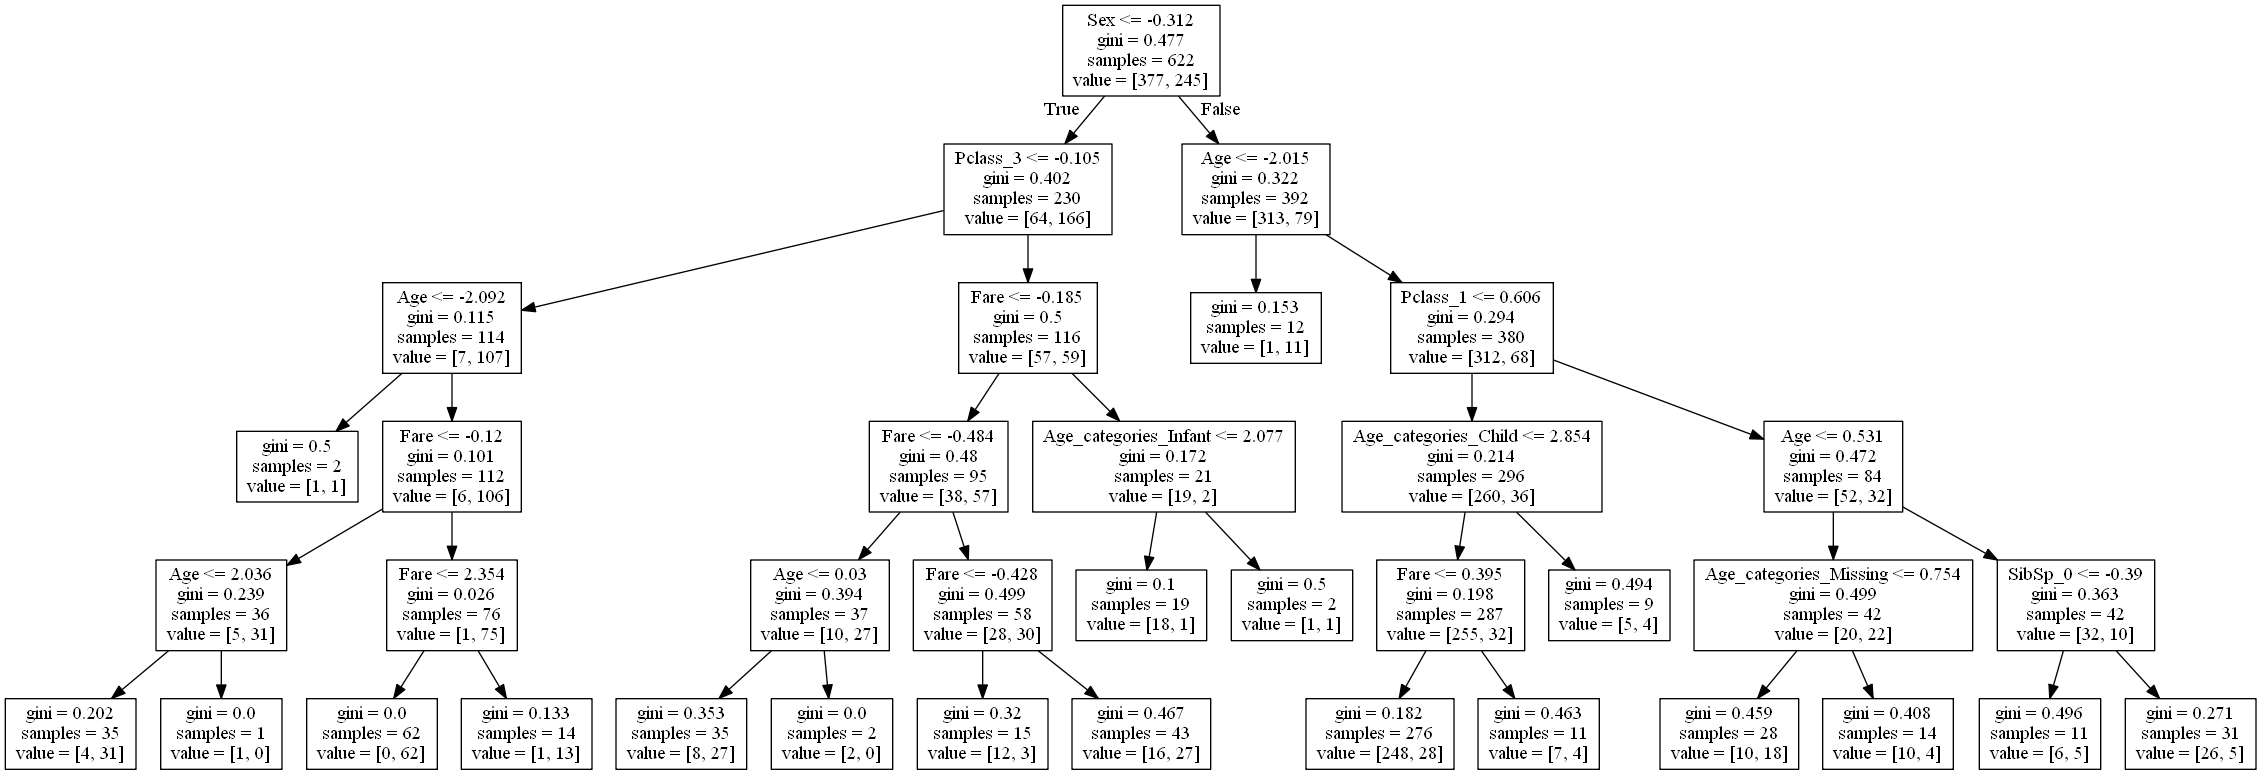

In [11]:
dot_data = StringIO()  
export_graphviz(gridtree.best_estimator_, out_file=dot_data, feature_names=datadums.columns)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [12]:
pd.DataFrame(confusion_matrix(ytest, gridtree.predict(Xtest)), columns =['predDie','predSurvived'] ,index=['trueDie','trueSurvived'])

,predDie,predSurvived
trueDie,151,21
trueSurvived,27,68


In [13]:
fpr0, tpr0, thresholds0 = roc_curve(ytest, gridtree.predict_proba(Xtest)[:, 1], drop_intermediate=False)

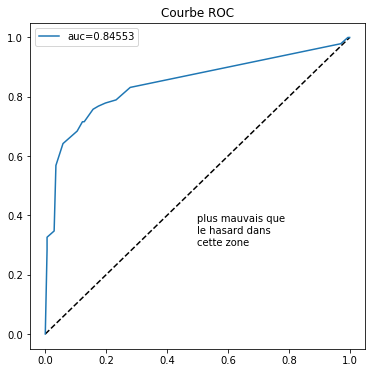

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

## Conclusion : 
- Ancien modele de regression logistique 

<div style='display:Flex'><img src="oldres.png"><img src="oldres2.PNG"></div>

- Nouveau modele d'arbre de classification
<div style='display:Flex'><img src="newres.png"><img src="newres2.png"></div>